In [68]:
import pandas as pd

housing_data = pd.read_csv('washington_state_housing_data.csv')
zero_price_rows = housing_data[housing_data['price'] == 0]

zero_price_rows

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,zip
4354,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962,0,Federal Way,98001
4356,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960,2001,Seattle,98199
4357,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983,Burien,98146
4358,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983,0,Issaquah,98075
4361,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,1920,0,Burien,98166
4362,0.0,4.0,4.00,3680,18804,2.0,0,0,3,3680,0,1990,2009,Sammamish,98074
4374,0.0,2.0,2.50,2200,188200,1.0,0,3,3,2200,0,2007,0,Enumclaw,98022
4376,0.0,4.0,2.25,2170,10500,1.0,0,2,4,1270,900,1960,2001,Normandy Park,98166
4382,0.0,5.0,4.50,4630,6324,2.0,0,0,3,3210,1420,2006,0,Snoqualmie,98065
4383,0.0,5.0,4.00,4430,9000,2.0,0,0,3,4430,0,2013,1923,Bellevue,98004


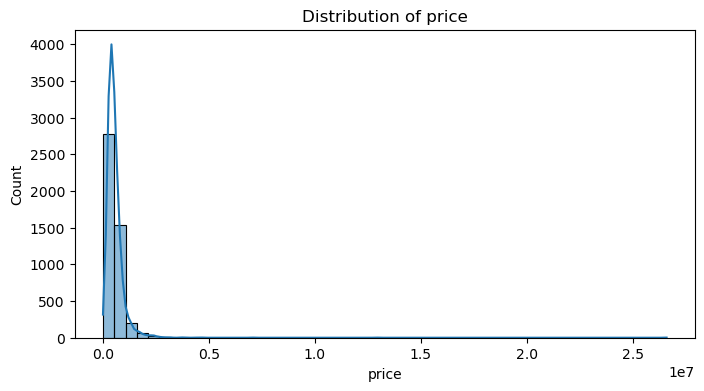

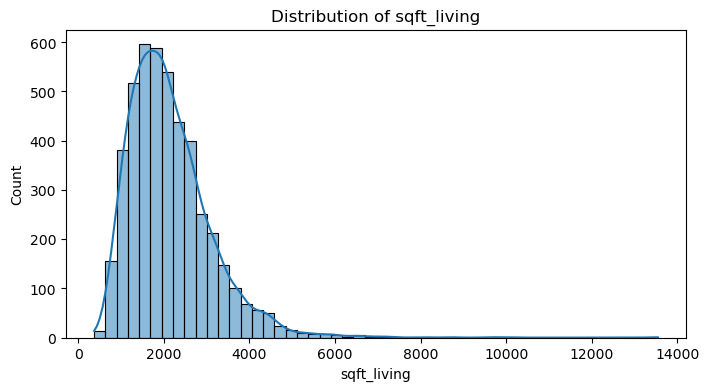

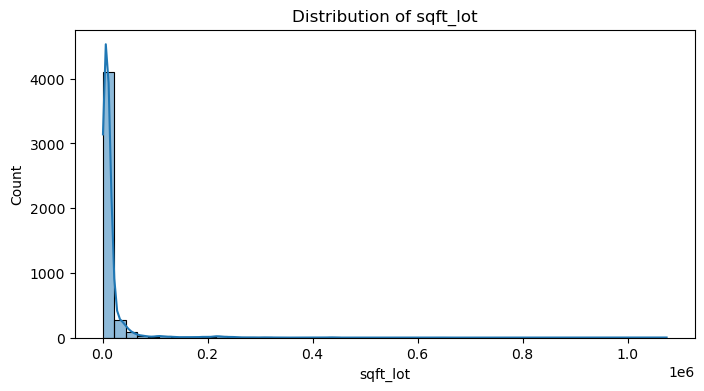

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to check
features = ['price', 'sqft_living', 'sqft_lot']

# Create histograms and KDE plots for each
for col in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(housing_data[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


In [12]:
# |skewness| < 0.5: roughly symmetric (okay).

# 0.5–1: moderately skewed (might log).

# >1: highly skewed (log usually helps).

housing_data['price'].skew()

24.790932561757053

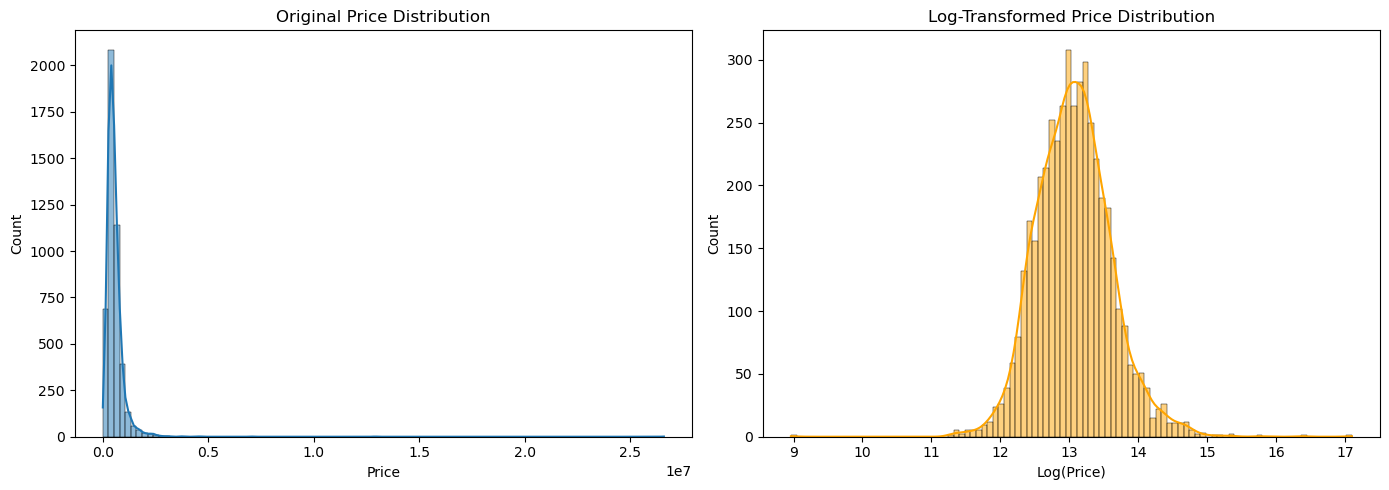

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Original prices
prices = housing_data['price']

# Log-transformed prices (avoid log(0) by filtering out zeros, if any)
log_prices = np.log(prices[prices > 0])

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original distribution
sns.histplot(prices, bins=100, kde=True, ax=axes[0])
axes[0].set_title("Original Price Distribution")
axes[0].set_xlabel("Price")
axes[0].set_ylabel("Count")

# Log-transformed distribution
sns.histplot(log_prices, bins=100, kde=True, ax=axes[1], color='orange')
axes[1].set_title("Log-Transformed Price Distribution")
axes[1].set_xlabel("Log(Price)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()
